# AI PROJECT ON INDIAN SIGN LANGUAGE DETECTOR

## INTRODUCTION
This dataset consists of the Indian sign language of all the alphabets in Indian hand recognition given by ISRTC(Indian Sign Research and Training Center).

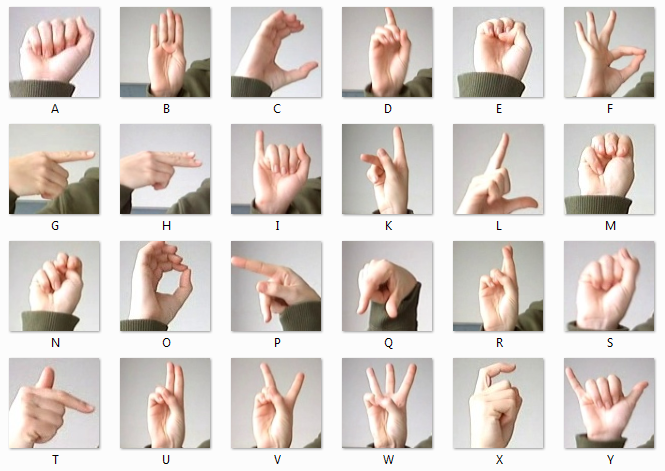

## DATA SUMMARY
This dataset contain total 4972 jpg images in 24 classes A to y.

## TASK: MULTICLASS CLASSIFICATION

## HOW DOES SIGN LANGUAGE WORK?
* People who are hearing impaired communication with the help of gesture-energetic movements of the hand accompanied by a living facial expression
* This language is also used at places where listening is not possible for ex... under water drivers 

## PROJECT DEVICE IN MULTIPLE STEPS
* Make subset of training, validation and testing as well as perform oversampling to balance the all classes
* Prepare training, validation and testing set
* Get all classes labels
* Convert [Train, validation, Test] set into (X_train,y_train)(X_valid,y_valid),(X_test,y_test) and convert categorical lebel into binary metrix
* Visualise training images
* Used Resnet50, VGG16 & EfficientnetB3 pre-trained model
* Model Compilation 
* Model Training
* Model Evaluation
* Model Saving
* Prediction on test data


## PYTHON IMPLIMENTATION

In [10]:
# Import necessary library
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Lambda, UpSampling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from glob import glob
import numpy as np

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

### Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### MAKE SUBSET OF TRAINING, TESTING AND VALIDATION

In [ ]:
import splitfolders
splitfolders.fixed(r"C:\Users\hp\Downloads\PRAICP-1000-IndiSignLang\Data",output='subset',seed=1337,
                  fixed=(55,55),oversample=True)


Copying files: 0 files [00:00, ? files/s]
Copying files: 101 files [00:00, 979.91 files/s]
Copying files: 223 files [00:00, 1082.68 files/s]
Copying files: 332 files [00:00, 1066.36 files/s]
Copying files: 459 files [00:00, 1114.62 files/s]
Copying files: 571 files [00:00, 1087.06 files/s]
Copying files: 687 files [00:00, 1071.62 files/s]
Copying files: 795 files [00:00, 1032.12 files/s]
Copying files: 899 files [00:00, 989.40 files/s] 
Copying files: 1002 files [00:00, 1000.49 files/s]
Copying files: 1104 files [00:01, 1005.63 files/s]
Copying files: 1222 files [00:01, 1036.41 files/s]
Copying files: 1349 files [00:01, 1058.47 files/s]
Copying files: 1455 files [00:01, 991.23 files/s] 
Copying files: 1555 files [00:01, 868.47 files/s]
Copying files: 1645 files [00:01, 649.12 files/s]
Copying files: 1719 files [00:01, 620.54 files/s]
Copying files: 1788 files [00:02, 610.85 files/s]
Copying files: 1863 files [00:02, 642.43 files/s]
Copying files: 1943 files [00:02, 669.95 files/s]
Cop

* Here we are perform oversampling because of classes is imbalance 

### Prepare Training, Validation & Testing Data

In [3]:
# Get path of all three folders
train_dir = '/content/drive/MyDrive/PRAICP-1000-IndiSignLang/subset/train'
val_dir   = '/content/drive/MyDrive/PRAICP-1000-IndiSignLang/subset/val'
test_dir  = '/content/drive/MyDrive/PRAICP-1000-IndiSignLang/subset/test'

In [4]:
train_datagen = ImageDataGenerator(rescale=(1./255),
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   rotation_range=40,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


val_datagen = ImageDataGenerator(rescale=(1./255),
                                 featurewise_center=True,
                                 featurewise_std_normalization=True,
                                  rotation_range=40,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=(1./255))

In [5]:
train_set = train_datagen.flow_from_directory(train_dir,
                                             target_size=(256,256),
                                             batch_size=128,
                                             class_mode='categorical',
                                             color_mode='rgb')

val_set = val_datagen.flow_from_directory(val_dir,
                                         target_size=(256,256),
                                         batch_size =128,
                                         class_mode='categorical',
                                         color_mode='rgb')

test_set = test_datagen.flow_from_directory(test_dir,
                                           target_size=(256,256),
                                           batch_size=128,
                                           class_mode='categorical',
                                           color_mode='rgb')

Found 3586 images belonging to 24 classes.
Found 1390 images belonging to 24 classes.
Found 1365 images belonging to 24 classes.


* After perform oversampling 3586 samples for training, 1390 for validation and 1365 samples goes for testing

### GET  ALL CLASS LABELS

In [6]:
# Get the label of all classes
train_set.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'O': 13,
 'P': 14,
 'Q': 15,
 'R': 16,
 'S': 17,
 'T': 18,
 'U': 19,
 'V': 20,
 'W': 21,
 'X': 22,
 'Y': 23}

* Total 24 classes is present in this data we need to seprate the labels as well as encode the categorical integer into binary matrix

### Split Training, Validation and Testing Data Into (X_train,X_test),(X_valid,y_valid),(X_test,y_test) & Convert Labels Into Binary Matrix

In [6]:
X_train, y_train = next(train_set)
X_valid, y_valid = next(val_set)
X_test,  y_test  = next(test_set)

In [7]:
X_train

array([[[[0.6509804 , 0.6627451 , 0.69803923],
         [0.65024954, 0.6627451 , 0.69803923],
         [0.6480707 , 0.66375697, 0.6990511 ],
         ...,
         [0.5686275 , 0.5803922 , 0.6156863 ],
         [0.5686275 , 0.5803922 , 0.6156863 ],
         [0.5686275 , 0.5803922 , 0.6156863 ]],

        [[0.6509804 , 0.6627451 , 0.69803923],
         [0.6509804 , 0.6627451 , 0.69803923],
         [0.64710885, 0.6627451 , 0.69803923],
         ...,
         [0.5686275 , 0.5803922 , 0.6156863 ],
         [0.5674855 , 0.5792502 , 0.61454433],
         [0.5662905 , 0.5780552 , 0.6133493 ]],

        [[0.6509804 , 0.6627451 , 0.69803923],
         [0.6509804 , 0.6627451 , 0.69803923],
         [0.6481706 , 0.6627451 , 0.69803923],
         ...,
         [0.56498027, 0.576745  , 0.6120391 ],
         [0.5647059 , 0.5764706 , 0.6117647 ],
         [0.5647059 , 0.5764706 , 0.6117647 ]],

        ...,

        [[0.5372549 , 0.5411765 , 0.5568628 ],
         [0.5372549 , 0.5411765 , 0.5568628 ]

In [8]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
# Shape of images, length of training images
X_train.shape

(128, 256, 256, 3)

* The shape of image is (256x256x3) with batch size 128

In [11]:
len(train_set)

29

* length of training set is 29 and batch size of images is 128 means 128*29=3712 images for training

### Visualise Training Images

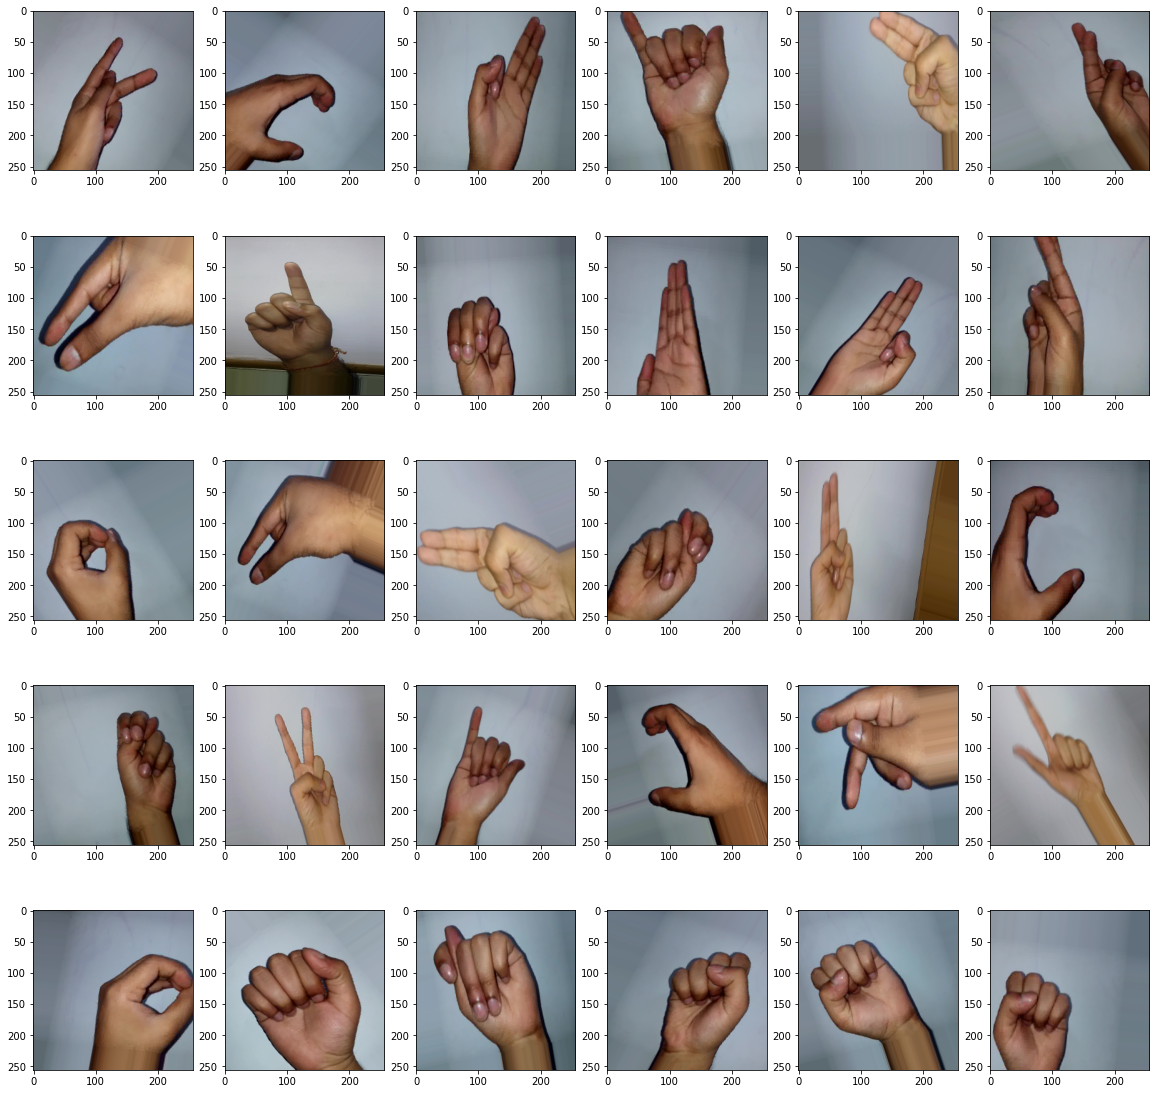

In [12]:
from matplotlib import pyplot
fig = plt.figure(figsize=(20,20))

for j in range(30):
    ax = fig.add_subplot(5,6,j+1)
    ax.imshow(X_train[j],cmap=pyplot.get_cmap('gray'))

### USE RESNET50 PRE-TRAINED MODEL

In [13]:
# Build resnet50 model

# Define the no of classes
no_classes = 24

model = Sequential() # Create model object


resnet_model = ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3),classes=24)
# 1st define the input image size 
# Weights: pre-trained imagenet dataset weights used
# include_top = False: Not include Fully connected layer at top
# classes= total 24 class present 


# Here we are train the existing weights to get the better result
for layer in resnet_model.layers:
    layer.trainable=True

model.add(resnet_model)
model.add(GlobalAveragePooling2D())  # Here we are used Average pooling to extract the features
model.add(Flatten())  # Convert 2D array into 1D
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))  # Used dropout to supress overfitting problem
model.add(BatchNormalization()) # Normalize the batches 
model.add(Dense(no_classes, activation='softmax')) # Used softmax activation function becuase of total 24 classes is present

94765736/94765736 [==============================] - 2s 0us/step


In [14]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                          

#### COMPILE MODEL

In [17]:
from tensorflow.keras.optimizers import Adam, Adamax
model.compile(loss='categorical_crossentropy',
             optimizer='adamax',
             metrics=['accuracy'])

#### TRAIN MODEL

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Set learning rate and monitor val_loss
lr_reducer = ReduceLROnPlateau(monitor='val_loss',
                               factor=0.5,
                               patience=2,
                               verbose=1)


# Save best model
check = ModelCheckpoint(filepath='resnet50_model.h5', verbose=1, save_best_only=True,monitor='val_loss')

# Create a list of lr_reducer and model saving
checkpoint= [lr_reducer,check]


# Train model on 300 epoch to get better result
resnet50_history = model.fit(X_train,y_train, epochs=300, 
                    validation_data=(X_valid,y_valid),
                    steps_per_epoch=4,
                    callbacks=checkpoint,shuffle=True)

Epoch 1/300
4/4 [==============================] - ETA: 0s - loss: 1.2048 - accuracy: 0.7578
Epoch 1: val_loss improved from inf to 3.98723, saving model to resnet50_model.h5
4/4 [==============================] - 10s 1s/step - loss: 1.2048 - accuracy: 0.7578 - val_loss: 3.9872 - val_accuracy: 0.0703 - lr: 0.0010
Epoch 2/300
4/4 [==============================] - ETA: 0s - loss: 0.4510 - accuracy: 0.8906
Epoch 2: val_loss did not improve from 3.98723
4/4 [==============================] - 2s 621ms/step - loss: 0.4510 - accuracy: 0.8906 - val_loss: 4.0481 - val_accuracy: 0.1094 - lr: 0.0010
Epoch 3/300
4/4 [==============================] - ETA: 0s - loss: 0.2249 - accuracy: 0.9453
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 3: val_loss did not improve from 3.98723
4/4 [==============================] - 2s 624ms/step - loss: 0.2249 - accuracy: 0.9453 - val_loss: 4.3035 - val_accuracy: 0.0781 - lr: 0.0010
Epoch 4/300
4/4 [===========================

#### PLOTTING TRAINING & VALIDATION ACCURAY AS WELL AS LOSS & VALIDATION LOSS

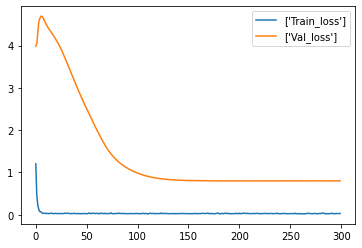

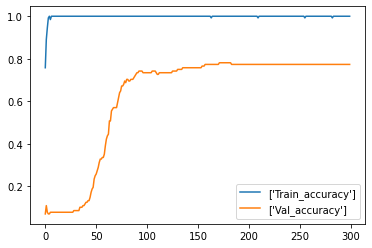

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(resnet50_history.history['loss'], label=['Train_loss'])
plt.plot(resnet50_history.history['val_loss'], label=['Val_loss'])
plt.legend()
plt.show()
plt.savefig('resnet50_Loss_valLoss')

plt.plot(resnet50_history.history['accuracy'], label=['Train_accuracy'])
plt.plot(resnet50_history.history['val_accuracy'], label=['Val_accuracy'])
plt.legend()
plt.show()
plt.savefig('resnet50_Accuracy_ValAccuracy')

* From above graph we can see that validation loss is decreases after every epoch as well as validation accuracy is increases.

### Model Evaluation

In [20]:
train_result = model.evaluate(X_train,y_train)
print("Train loss & Accuracy:",train_result)

test_result = model.evaluate(X_test,y_test)
print("Testing loss & Accuracy",test_result)

4/4 [==============================] - 1s 129ms/step - loss: 0.0067 - accuracy: 1.0000
Train loss & Accuracy: [0.00668429397046566, 1.0]
4/4 [==============================] - 1s 128ms/step - loss: 0.3905 - accuracy: 0.8828
Testing loss & Accuracy [0.3905099034309387, 0.8828125]


In [22]:
import pandas as pd
data = pd.DataFrame(zip(train_result, test_result),columns=['Train','Test'],index=['Loss','Accuracy'])
data

,Train,Test
Loss,0.006684,0.390510
Accuracy,1.000000,0.882812


### PREDICTION ON TEST DATA

In [25]:
y_pred = model.predict(X_test)
print(y_pred)

4/4 [==============================] - 2s 141ms/step
[[9.7160919e-06 5.9232016e-06 9.6067160e-06 ... 1.6293785e-05
  3.0009956e-05 7.5903031e-06]
 [7.7966619e-01 3.2932204e-03 1.0204582e-03 ... 1.6820194e-03
  1.4985279e-03 5.4050736e-02]
 [1.6906173e-03 2.7751923e-02 8.7631453e-04 ... 1.4866774e-03
  2.8255302e-03 6.9972599e-04]
 ...
 [1.7683756e-03 2.1377389e-04 4.4311564e-03 ... 6.4692268e-04
  4.7855140e-03 5.0188769e-03]
 [1.5986722e-04 1.2438034e-04 5.1878233e-05 ... 4.2989743e-03
  3.3893570e-04 9.5789979e-04]
 [5.3156130e-02 3.4235690e-02 5.7272124e-03 ... 1.0365970e-02
  2.8813151e-03 2.0523740e-02]]


### LOAD MODEL

In [1]:
from tensorflow.keras.models import load_model

model = load_model("resnet50_model.h5")

### IMAGES TESTING

In [14]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Downloads\PRAICP-1000-IndiSignLang\subset\test\O\093.jpg",target_size=(256,256))

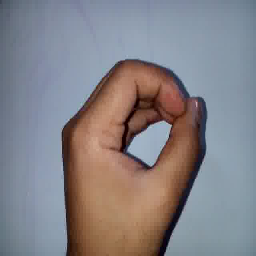

In [15]:
img

In [16]:
# Convert image into array
array = image.img_to_array(img)
array

array([[[ 61.,  69.,  82.],
        [ 66.,  74.,  87.],
        [ 75.,  83.,  96.],
        ...,
        [ 99., 118., 133.],
        [ 99., 118., 133.],
        [ 99., 118., 133.]],

       [[ 61.,  69.,  82.],
        [ 66.,  74.,  87.],
        [ 75.,  83.,  96.],
        ...,
        [ 99., 118., 133.],
        [ 99., 118., 133.],
        [ 99., 118., 133.]],

       [[ 61.,  69.,  82.],
        [ 66.,  74.,  87.],
        [ 75.,  83.,  96.],
        ...,
        [ 99., 118., 133.],
        [ 99., 118., 133.],
        [ 99., 118., 133.]],

       ...,

       [[ 89., 103., 114.],
        [ 89., 103., 114.],
        [ 89., 103., 114.],
        ...,
        [106., 126., 137.],
        [106., 126., 137.],
        [106., 126., 137.]],

       [[ 89., 103., 114.],
        [ 89., 103., 114.],
        [ 89., 103., 114.],
        ...,
        [106., 126., 137.],
        [106., 126., 137.],
        [106., 126., 137.]],

       [[ 89., 103., 114.],
        [ 89., 103., 114.],
        [ 89., 1

In [17]:
# shape of image
array.shape

(256, 256, 3)

In [18]:
# Scaling 
array = array/255

In [19]:
array

array([[[0.23921569, 0.27058825, 0.32156864],
        [0.25882354, 0.2901961 , 0.34117648],
        [0.29411766, 0.3254902 , 0.3764706 ],
        ...,
        [0.3882353 , 0.4627451 , 0.52156866],
        [0.3882353 , 0.4627451 , 0.52156866],
        [0.3882353 , 0.4627451 , 0.52156866]],

       [[0.23921569, 0.27058825, 0.32156864],
        [0.25882354, 0.2901961 , 0.34117648],
        [0.29411766, 0.3254902 , 0.3764706 ],
        ...,
        [0.3882353 , 0.4627451 , 0.52156866],
        [0.3882353 , 0.4627451 , 0.52156866],
        [0.3882353 , 0.4627451 , 0.52156866]],

       [[0.23921569, 0.27058825, 0.32156864],
        [0.25882354, 0.2901961 , 0.34117648],
        [0.29411766, 0.3254902 , 0.3764706 ],
        ...,
        [0.3882353 , 0.4627451 , 0.52156866],
        [0.3882353 , 0.4627451 , 0.52156866],
        [0.3882353 , 0.4627451 , 0.52156866]],

       ...,

       [[0.34901962, 0.40392157, 0.44705883],
        [0.34901962, 0.40392157, 0.44705883],
        [0.34901962, 0

In [20]:
# Expand the diamension
array = np.expand_dims(array, axis=0)
imge_data= preprocess_input(array)

# Prediction
model.predict(imge_data)

1/1 [==============================] - 0s 135ms/step


array([[2.3378423e-14, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [22]:
# Final prediction
# Final prediction 
img = np.argmax(model.predict(imge_data), axis=1)
print('Prediction:',img)

if img == 0:
    print('A')
elif img == 1:
    print('B')
elif img == 2:
    print('C')
elif img == 3:
    print('D')
elif img == 4:
    print('E')
elif img == 5:
    print('F')
elif img == 6:
    print('G')
elif img == 7:
    print('H')
elif img == 8:
    print('I')
elif img == 9:
    print('K')
elif img == 10:
    print('L')
elif img == 11:
    print('M')
elif img == 12:
    print('N')
elif img == 13:
    print('O')
elif img == 14:
    print('P')
elif img == 15:
    print('Q')
elif img == 16:
    print('R')
elif img == 17:
    print('S')
elif img == 18:
    print('T')
elif img == 19:
    print('U')
elif img == 20:
    print('V')
elif img == 21:
    print('W')
elif img == 22:
    print('X')
else:
    print('Y')

1/1 [==============================] - 0s 102ms/step
Prediction: [13]
O


* Model predict correct 13 class i.e O

###  USE VGG16 PRE-TRAINED MODEL

In [27]:
from tensorflow.keras.applications.vgg16 import VGG16

# Define image size
image_size = [256,256]

vgg16 = VGG16(input_shape=image_size+[3], weights='imagenet', include_top=False)


# Here we Dont train the existing weights
for layer in vgg16.layers:
    layer.trainable=False
    

# get length of folder
folder = glob('/content/drive/MyDrive/PRAICP-1000-IndiSignLang/subset/train/*')
print('Length of folders:',len(folder))


# Adding more layer to create a object
x = Flatten()(vgg16.output)
prediction = Dense(len(folder), activation='softmax')(x)
vgg16_model = Model(inputs=vgg16.input, outputs=prediction)


# Summary of model
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Length of folders: 24
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                        

#### COMPILE AND TRAIN VGG16 MODEL

In [28]:
vgg16_model.compile(loss='categorical_crossentropy',
                   optimizer='adamax',
                   metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Set learning rate 
lr_reducer = ReduceLROnPlateau(monitor='val_loss',
                               factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=2,
                               min_lr=0.5e-6)

check = ModelCheckpoint(filepath='vgg16_model.h5', verbose=1, save_best_only=True)

call = [lr_reducer, check]


# Fit model for training
vgg16_history = vgg16_model.fit(X_train,y_train, epochs=300, 
                validation_data=(X_valid,y_valid),
                steps_per_epoch=4,
                callbacks=call)


Epoch 1/300
4/4 [==============================] - ETA: 0s - loss: 4.7687 - accuracy: 0.1016
Epoch 1: val_loss improved from inf to 4.28707, saving model to vgg16_model.h5
4/4 [==============================] - 7s 756ms/step - loss: 4.7687 - accuracy: 0.1016 - val_loss: 4.2871 - val_accuracy: 0.1172 - lr: 0.0010
Epoch 2/300
4/4 [==============================] - ETA: 0s - loss: 2.1954 - accuracy: 0.4766
Epoch 2: val_loss improved from 4.28707 to 3.41336, saving model to vgg16_model.h5
4/4 [==============================] - 2s 679ms/step - loss: 2.1954 - accuracy: 0.4766 - val_loss: 3.4134 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 3/300
4/4 [==============================] - ETA: 0s - loss: 1.1400 - accuracy: 0.7109
Epoch 3: val_loss improved from 3.41336 to 2.95261, saving model to vgg16_model.h5
4/4 [==============================] - 2s 523ms/step - loss: 1.1400 - accuracy: 0.7109 - val_loss: 2.9526 - val_accuracy: 0.2188 - lr: 0.0010
Epoch 4/300
4/4 [==============================] -

**VGG16 model perform well on training data but in validation side accuracy is extreme less, as well as validation loss is also high**

### MODEL EVALUATION

In [31]:
vgg16_train_result = vgg16_model.evaluate(X_train,y_train)
print("VGG16 Training Loss & Accuracy",vgg16_train_result)
vgg16_test_result = vgg16_model.evaluate(X_test,y_test)
print("VGG16 Testing Loss & Accuracy",vgg16_test_result)

4/4 [==============================] - 1s 197ms/step - loss: 0.0771 - accuracy: 1.0000
VGG16 Training Loss & Accuracy [0.07713527977466583, 1.0]
4/4 [==============================] - 1s 198ms/step - loss: 1.7651 - accuracy: 0.4766
VGG16 Testing Loss & Accuracy [1.765055537223816, 0.4765625]


In [32]:
vgg16_data = pd.DataFrame(zip(vgg16_train_result,vgg16_test_result),columns=['Training','Testing'],index=['Loss','Accuracy'])
vgg16_data

,Training,Testing
Loss,0.077135,1.765056
Accuracy,1.000000,0.476562


**VGG16 model perform well on training data but in testing data score is very less as well as loss is also high**

##### Note: Here we are not do any prediction becuase model is not perform good on testing data as well as we are not select this model

### USE EFFIECIENT-NETB3 PRE-TRAINED MODEL 

In [11]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3

IMAGE_SIZE = [256,256]

base_model = EfficientNetB3(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False, pooling='max')


# Here we will be train initial model to get better result
base_model.trainable = True


43941136/43941136 [==============================] - 1s 0us/step


In [12]:
from tensorflow.python.keras import regularizers

# Add extra layers
y = base_model.output
y = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(y)  # Set momentun and epsilon
y = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006) ,activation='relu')(y)
y = Dropout(rate=.45, seed=123)(y)        
output=Dense(24, activation='softmax')(y)
efficientnet = Model(inputs=base_model.input, outputs=output)



# kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
# activity_regularizer: Regularizer to apply a penalty on the layer's output
# bias_regularizer: Regularizer to apply a penalty on the layer's bias

In [13]:
# Model summary
efficientnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 256, 256, 3)  0           ['normalization[0][0]']      

#### COMPILE AND TRAIN MODEL

In [14]:
efficientnet.compile(optimizer='adamax', 
                     loss='categorical_crossentropy',
                     metrics=['accuracy']) 

In [15]:
# Fit model for training
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# custom  callbacks to control learning rate 

reducer_lr = ReduceLROnPlateau(monitor="val_loss",
                               factor=0.5, 
                               patience=2,
                               verbose=1,
                               min_lr=0.5e-6)


# Save best model
save = ModelCheckpoint(filepath='efficientnetb3_model.h5', verbose=1, save_best_only=True)


callbacks = [reducer_lr, save]

# Model train on 300 epochs
efficient_history = efficientnet.fit(X_train,y_train,
                                    epochs=300,
                                    validation_data=(X_valid,y_valid),
                                    shuffle=False, # Here we dont shuffle the images
                                    callbacks=callbacks)

Epoch 1/300
4/4 [==============================] - ETA: 0s - loss: 11.4718 - accuracy: 0.0938
Epoch 1: val_loss improved from inf to 16.80301, saving model to efficientnetb3_model.h5
4/4 [==============================] - 30s 2s/step - loss: 11.4718 - accuracy: 0.0938 - val_loss: 16.8030 - val_accuracy: 0.0469 - lr: 0.0010
Epoch 2/300
4/4 [==============================] - ETA: 0s - loss: 9.1758 - accuracy: 0.6016
Epoch 2: val_loss improved from 16.80301 to 15.14210, saving model to efficientnetb3_model.h5
4/4 [==============================] - 5s 1s/step - loss: 9.1758 - accuracy: 0.6016 - val_loss: 15.1421 - val_accuracy: 0.0469 - lr: 0.0010
Epoch 3/300
4/4 [==============================] - ETA: 0s - loss: 8.3827 - accuracy: 0.8125
Epoch 3: val_loss improved from 15.14210 to 13.56578, saving model to efficientnetb3_model.h5
4/4 [==============================] - 5s 1s/step - loss: 8.3827 - accuracy: 0.8125 - val_loss: 13.5658 - val_accuracy: 0.0469 - lr: 0.0010
Epoch 4/300
4/4 [====

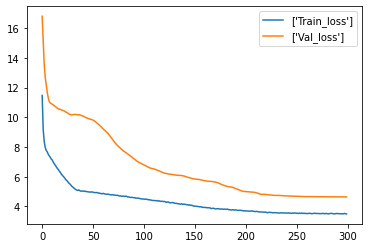

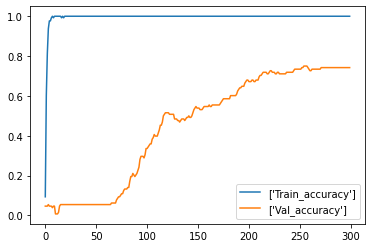

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(efficient_history.history['loss'], label=['Train_loss'])
plt.plot(efficient_history.history['val_loss'], label=['Val_loss'])
plt.legend()
plt.show()
plt.savefig('efficient_Loss_valLoss')

plt.plot(efficient_history.history['accuracy'], label=['Train_accuracy'])
plt.plot(efficient_history.history['val_accuracy'], label=['Val_accuracy'])
plt.legend()
plt.show()
plt.savefig('efficient_Accuracy_ValAccuracy')

* From above graph we can see that validation as well as training loss is high and validation accuracy also less.

### MODEL EVALUATION

In [17]:
efficient_train_result = efficientnet.evaluate(X_train,y_train)
print('Training Loss & Accuracy',efficient_train_result)

efficient_test_result = efficientnet.evaluate(X_test,y_test)
print('Testing Loss & Accuracy', efficient_test_result)

4/4 [==============================] - 1s 149ms/step - loss: 3.4699 - accuracy: 1.0000
Training Loss & Accuracy [3.4699418544769287, 1.0]
4/4 [==============================] - 1s 147ms/step - loss: 4.0854 - accuracy: 0.9062
Testing Loss & Accuracy [4.085390090942383, 0.90625]


In [20]:
import pandas as pd
efficient_data = pd.DataFrame(zip(efficient_train_result,efficient_test_result),columns=['Training','Testing'],index=['Loss','Accuracy'])
efficient_data

,Training,Testing
Loss,3.469942,4.08539
Accuracy,1.000000,0.90625


**In EfficientnetB3 Training score is good but training loss is around 3.46 as well as testing score around 90% and loss is 4.08.**

### PREDICTION ON TEST DATA

In [22]:
y_predict_efficinetnet = efficientnet.predict(X_test)
y_predict_efficinetnet

4/4 [==============================] - 1s 155ms/step


array([[0.00983046, 0.00167025, 0.00356225, ..., 0.00330197, 0.00312213,
        0.01132334],
       [0.01508138, 0.01056287, 0.01236427, ..., 0.01345885, 0.01369687,
        0.00765909],
       [0.09525432, 0.00766635, 0.01675769, ..., 0.02782972, 0.06171406,
        0.16995049],
       ...,
       [0.02829997, 0.01870533, 0.01722504, ..., 0.14969401, 0.01888581,
        0.00474543],
       [0.01060604, 0.00422022, 0.00727956, ..., 0.00600167, 0.02314508,
        0.00691235],
       [0.03602903, 0.0238147 , 0.05626012, ..., 0.19369122, 0.0163879 ,
        0.01488391]], dtype=float32)

### LOAD MODEL

In [29]:
efficientnet = load_model('efficientnetb3_model.h5')

### TEST IMAGES

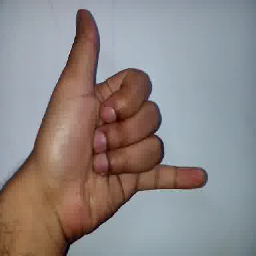

In [57]:
from tensorflow.keras.preprocessing import image
imge = image.load_img(r"C:\Users\hp\Downloads\PRAICP-1000-IndiSignLang\subset\test\Y\195.jpg",target_size=(256,256))
imge

In [58]:
# Convert image into array
arr = image.img_to_array(imge)
arr

array([[[117., 126., 133.],
        [117., 126., 133.],
        [117., 126., 133.],
        ...,
        [105., 119., 130.],
        [105., 119., 130.],
        [105., 119., 130.]],

       [[117., 126., 133.],
        [117., 126., 133.],
        [117., 126., 133.],
        ...,
        [105., 119., 130.],
        [105., 119., 130.],
        [105., 119., 130.]],

       [[117., 126., 133.],
        [117., 126., 133.],
        [117., 126., 133.],
        ...,
        [105., 119., 130.],
        [105., 119., 130.],
        [105., 119., 130.]],

       ...,

       [[110.,  71.,  40.],
        [105.,  66.,  35.],
        [ 96.,  57.,  26.],
        ...,
        [ 95., 109., 110.],
        [ 95., 109., 110.],
        [ 95., 109., 110.]],

       [[110.,  71.,  40.],
        [105.,  66.,  35.],
        [ 96.,  57.,  26.],
        ...,
        [ 95., 109., 110.],
        [ 95., 109., 110.],
        [ 95., 109., 110.]],

       [[110.,  71.,  40.],
        [105.,  66.,  35.],
        [ 96.,  

In [59]:
# Check shape of image
arr.shape

(256, 256, 3)

In [60]:
# Scale image
arr = arr/255

In [61]:
# Expand the diamension 
arr = np.expand_dims(arr, axis=0)
img_data = preprocess_input(arr)

# Prediction
efficientnet.predict(img_data)

1/1 [==============================] - 0s 97ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

* Here we can see that Model predict wrong, because of training loss as well as Testing loss is high.

### CONCLUSION

* Resnet50 model perform well on training as well as testing data and both training and testing loss is less. as well as model predict correct result
* VGG16 model is not perform good on testing data
* EfficientnetB3 model training & Testing accuracy is good but training and testing loss is high, that's why model predict wrong output
* From above models we are select Resnet50 model